# pcolormesh Generator

In [45]:
import numpy as np 
import pandas as pd 
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [106]:
# -----------------------------------------------------------------------
# # setup program constants 
# percentage of poisoning levels  
POI_RNG = [.01, .025, .05, .075, .1, .125, .15, .175, .2]
# total number of poisoning levels 
NPR = len(POI_RNG)
# percentage of features that we want to select 
SEL_PERCENT = .1
# number of algorithms that we are going to test [JMI, MIM, MRMR, MIFS]
NALG = 4
# used when we select features 
FEAT_IDX = 0
# number of cross validation runs to perform
CV = 5
# dataset names 
# did not run 
#   - bank, miniboone, ozone, spambase, connect-4, oocytes_merluccius_nucleus_4d
DATA = [
         'conn-bench-sonar-mines-rocks',
        'ionosphere',
        'bank',
        'oocytes_trisopterus_nucleus_2f', 
        'statlog-german-credit', 
        'molec-biol-promoter', 
        # 'ozone', 
        # 'spambase',
        'parkinsons', 
        'oocytes_merluccius_nucleus_4d',
        'musk-1', 
#         'musk-2', 
        'chess-krvkp', 
         'twonorm'
        ]
BOX = ['0.5', '1', '1.5', '2', '2.5', '5']
ALGS = ['MIM', 'MIFS', 'MRMR', 'JMI']
param = ['M1', 'M2', 'M3', 'jacc']
# -----------------------------------------------------------------------

clrs = ['g', 'k', 'b', 'r']
mkrs = ['*', 's', 'o', '^']

#-------------------------------------------------------------------------

C:\Users\Srishti\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


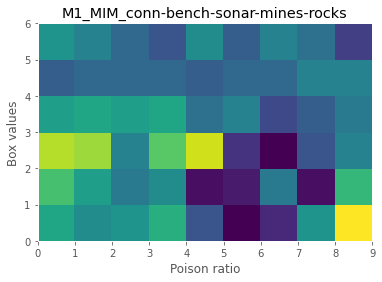

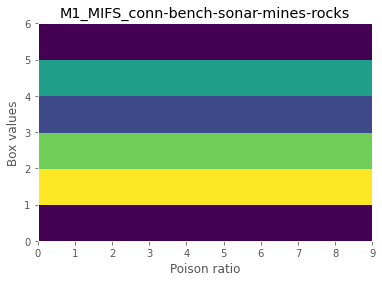

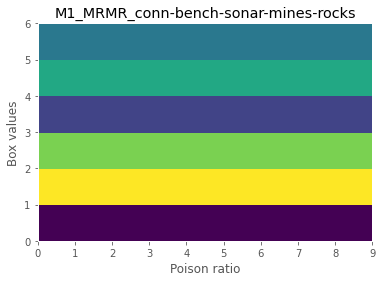

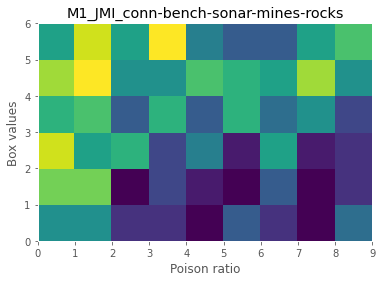

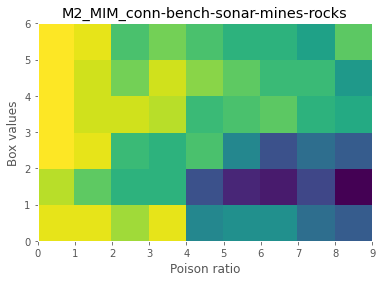

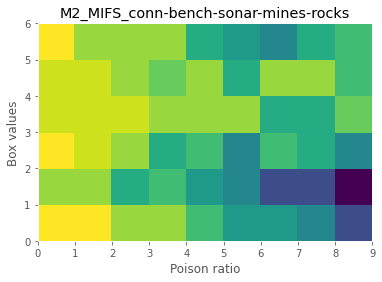

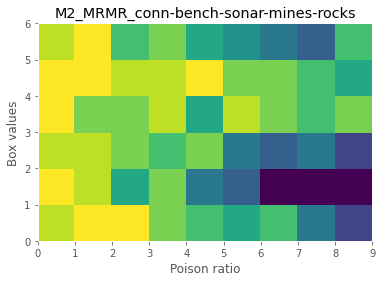

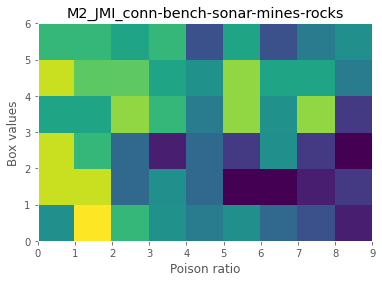

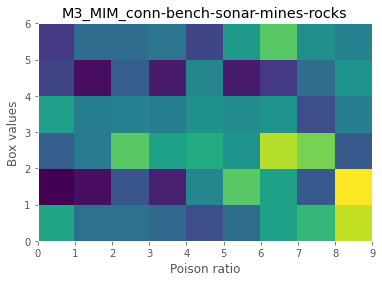

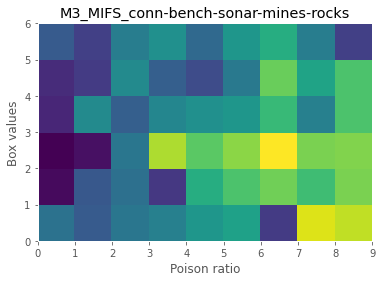

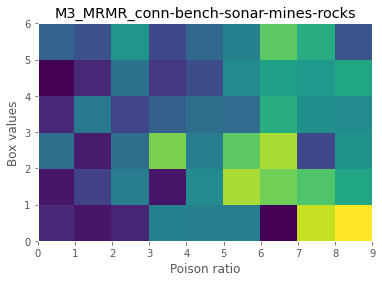

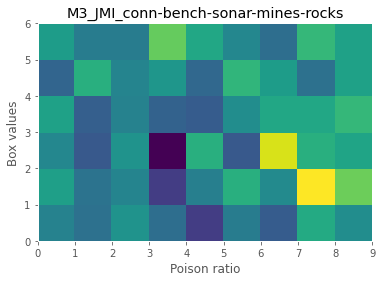

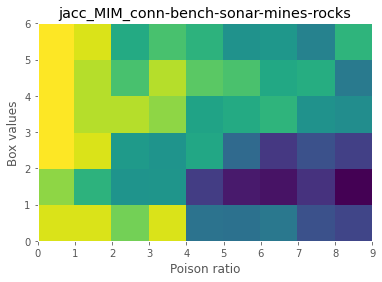

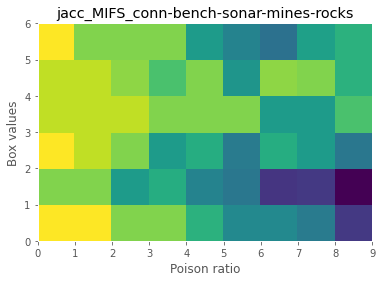

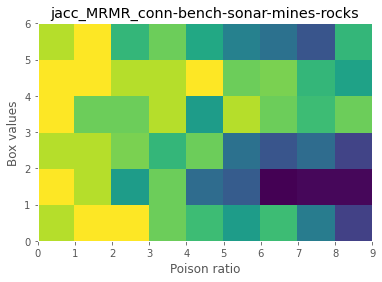

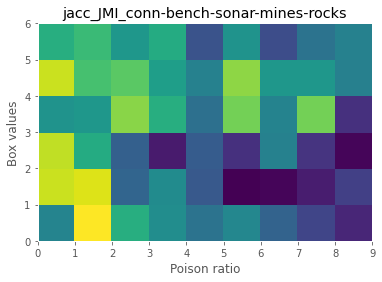

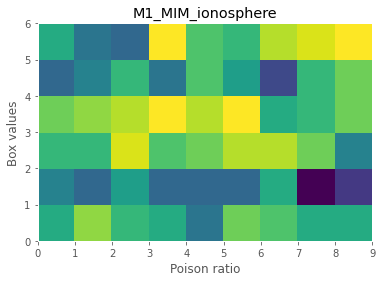

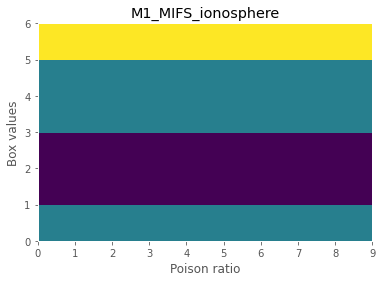

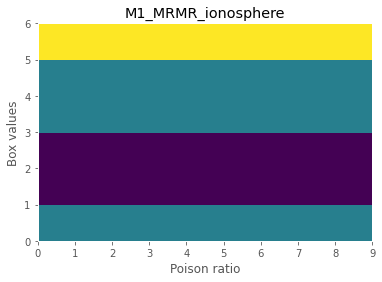

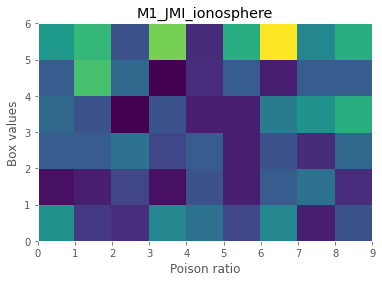

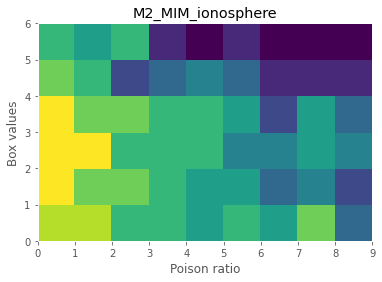

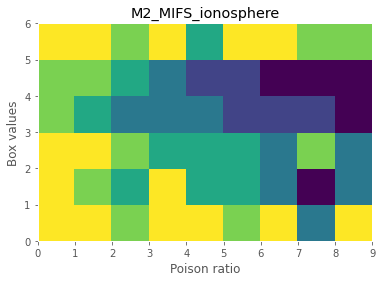

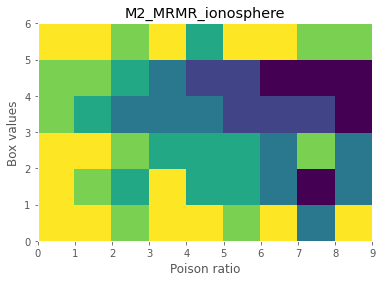

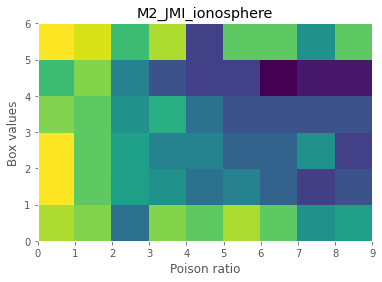

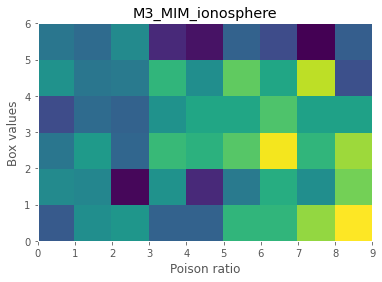

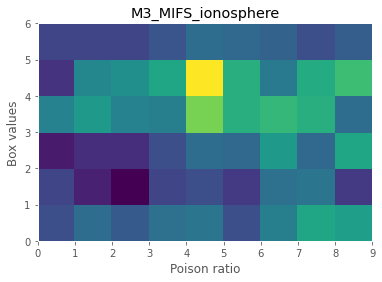

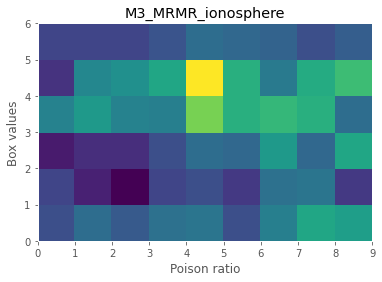

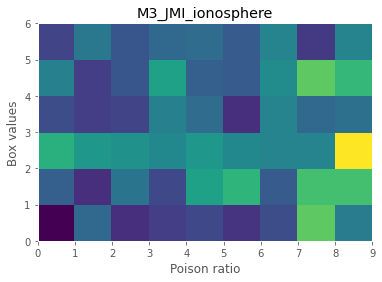

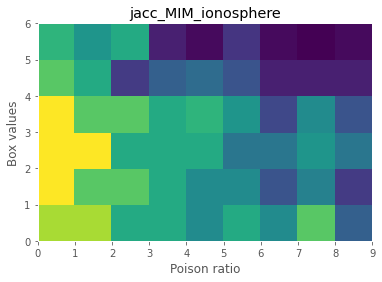

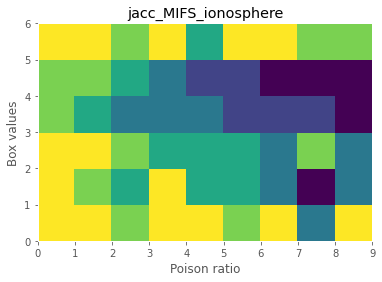

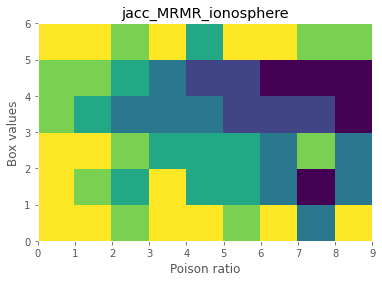

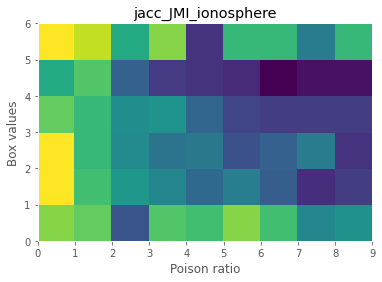

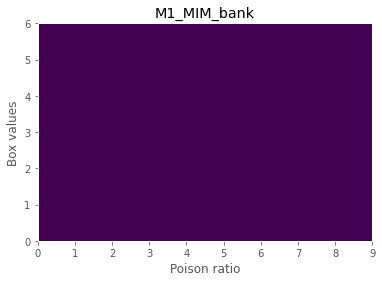

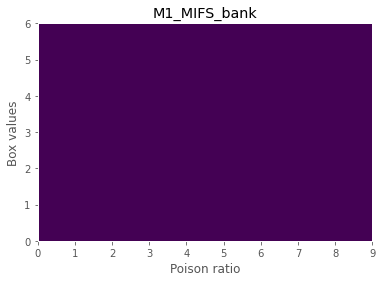

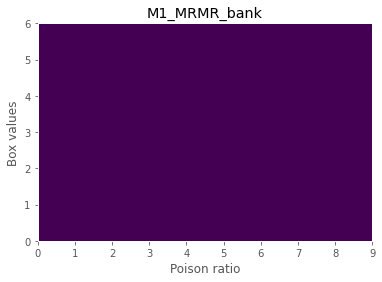

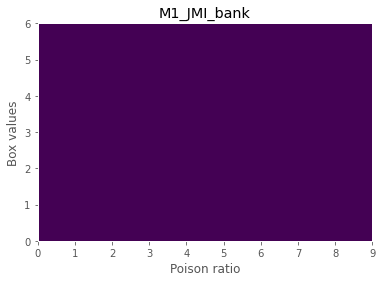

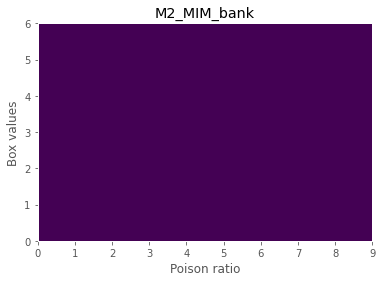

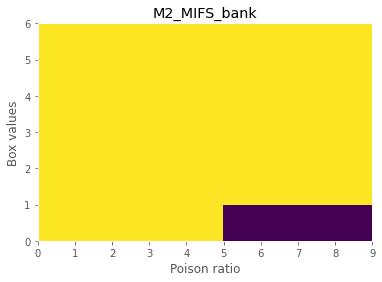

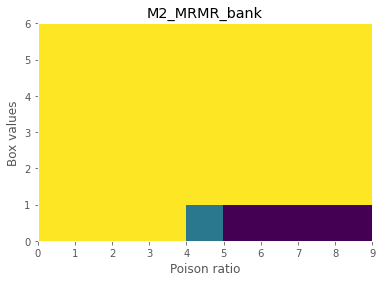

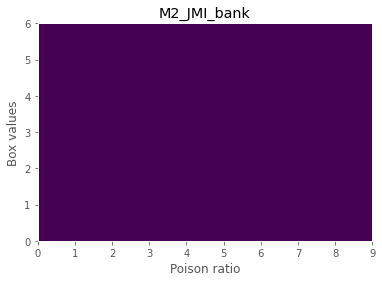

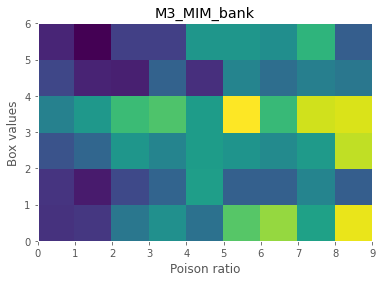

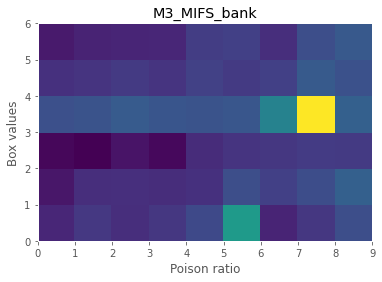

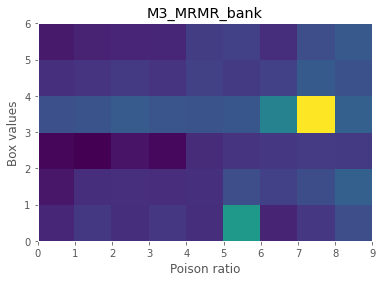

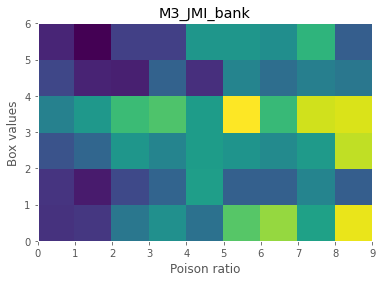

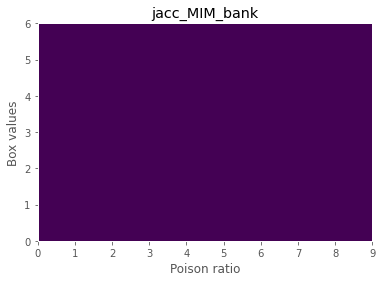

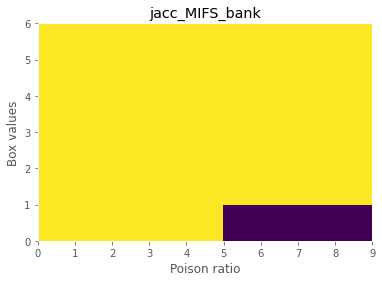

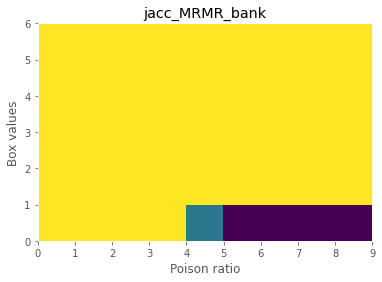

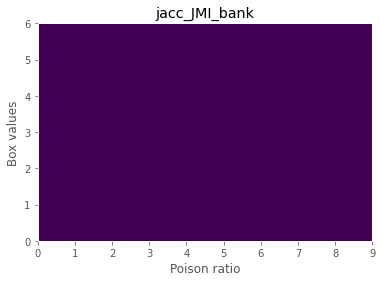

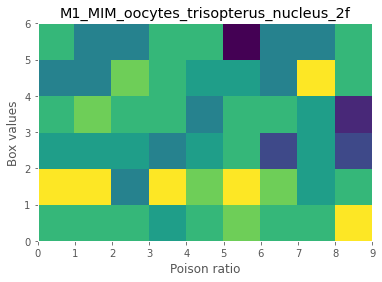

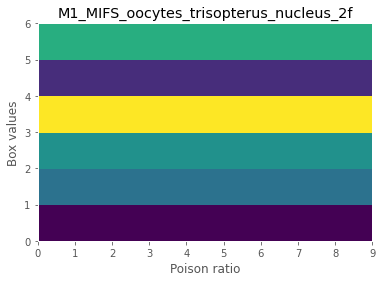

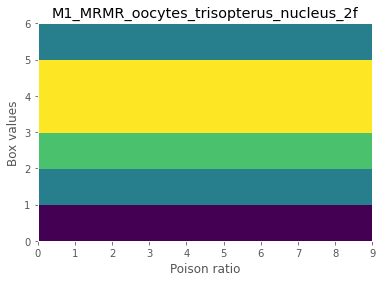

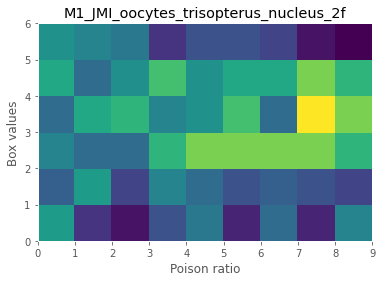

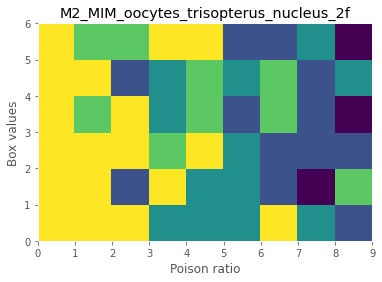

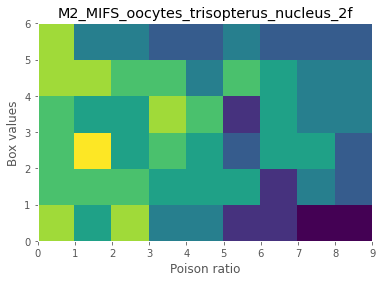

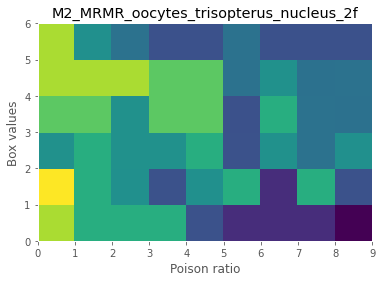

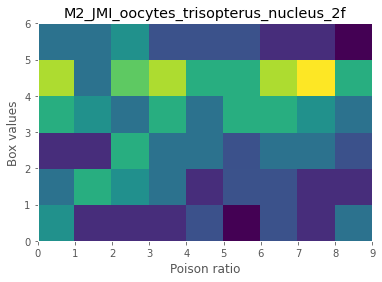

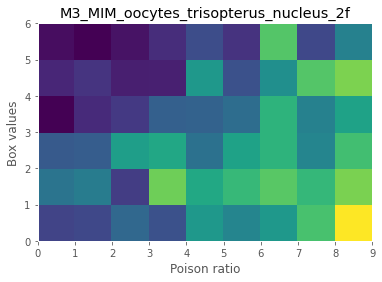

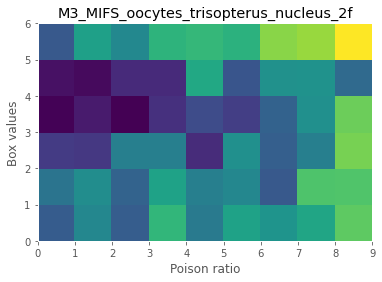

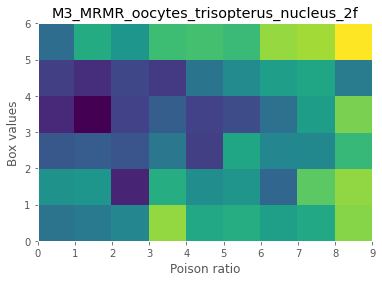

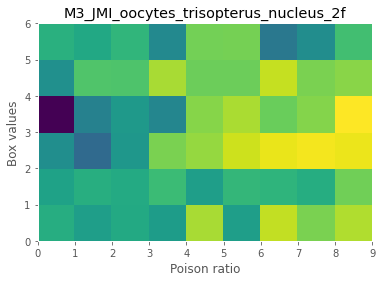

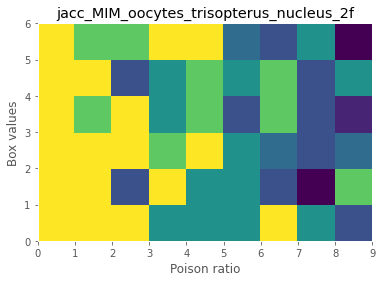

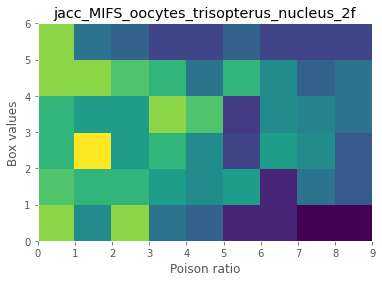

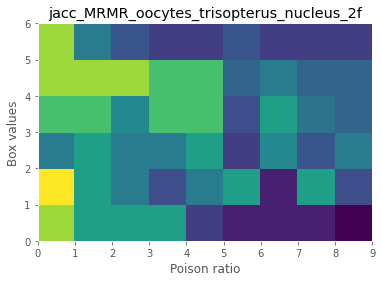

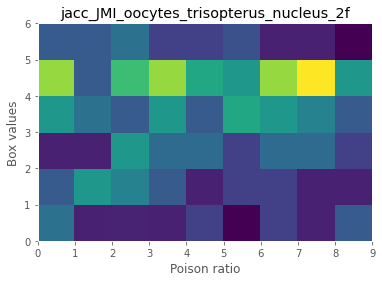

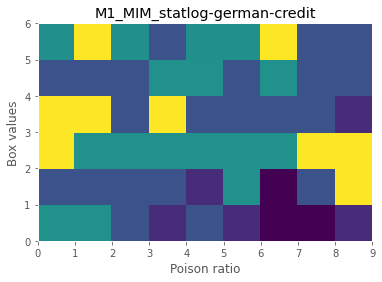

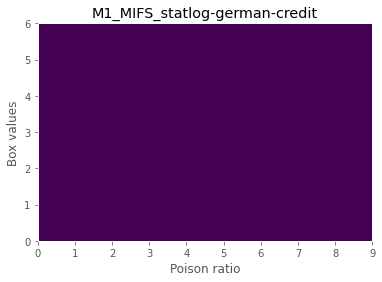

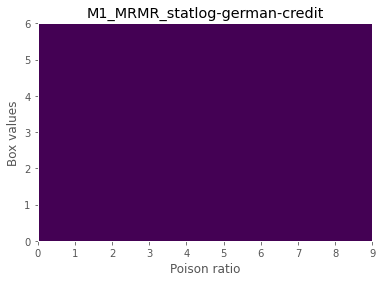

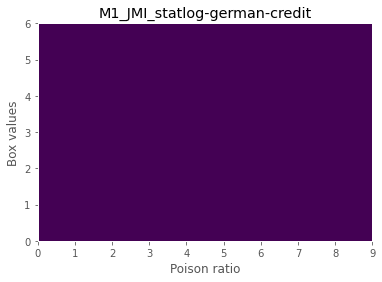

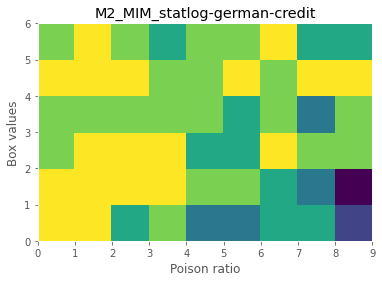

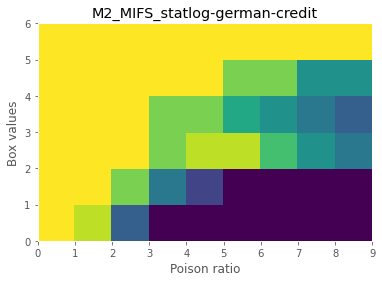

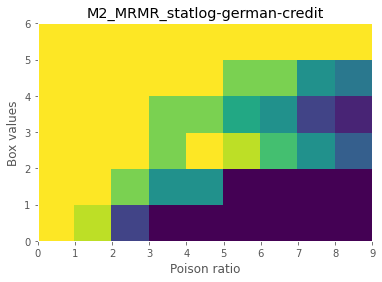

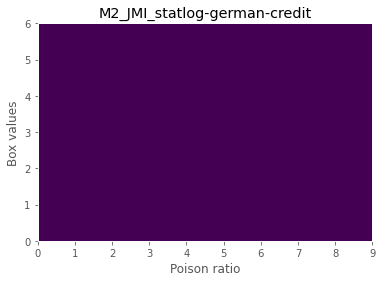

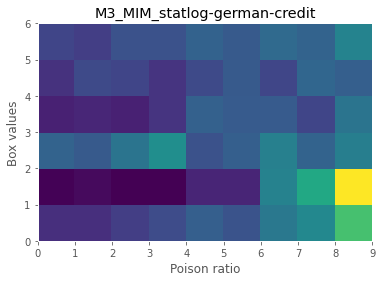

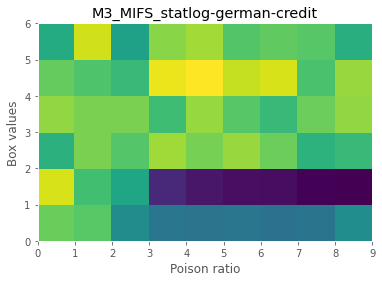

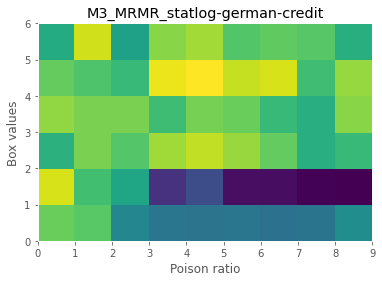

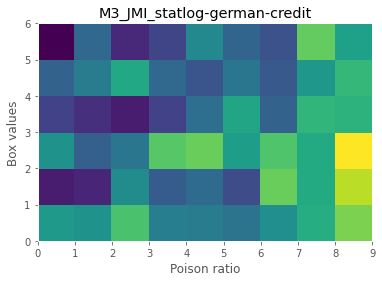

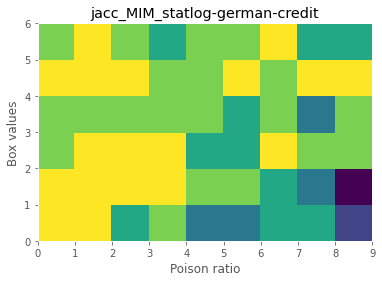

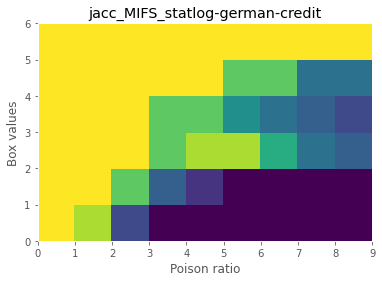

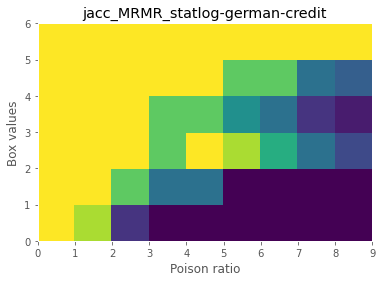

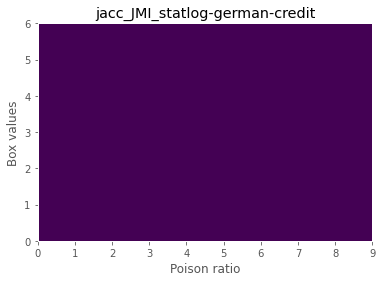

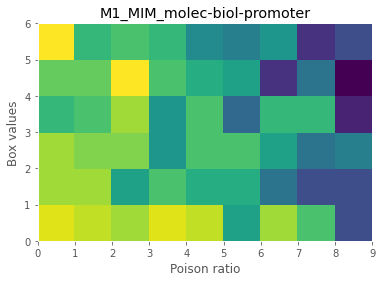

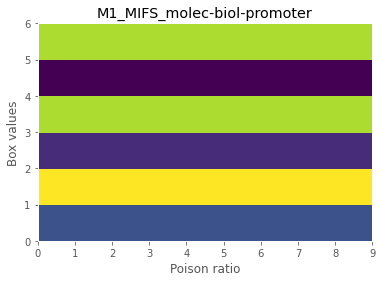

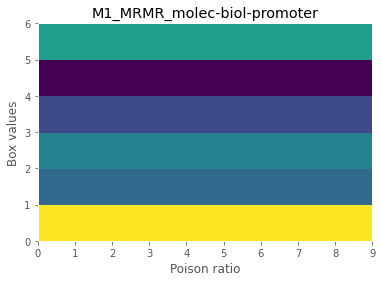

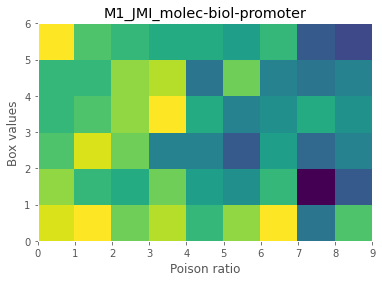

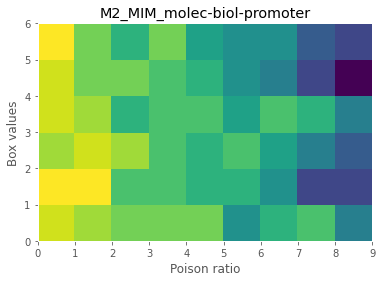

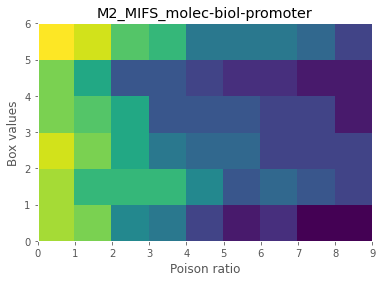

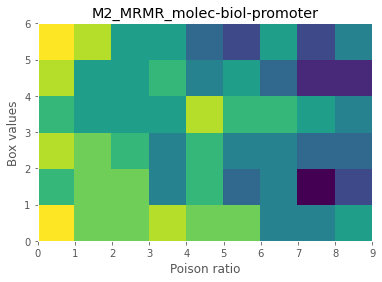

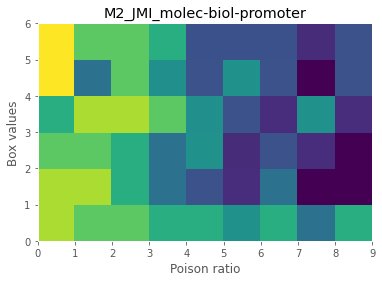

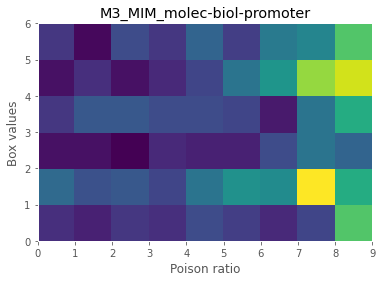

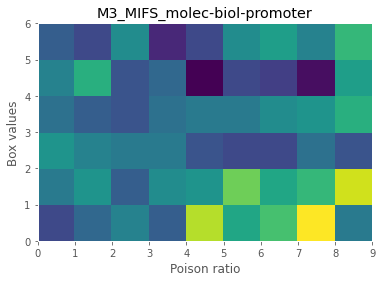

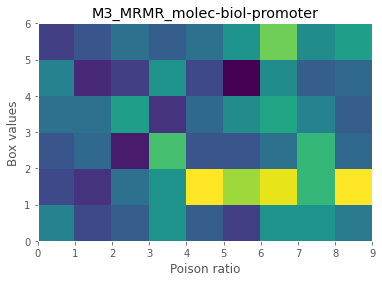

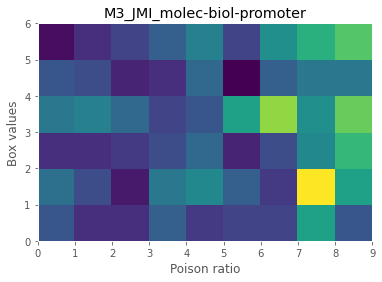

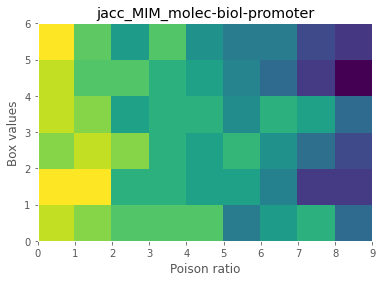

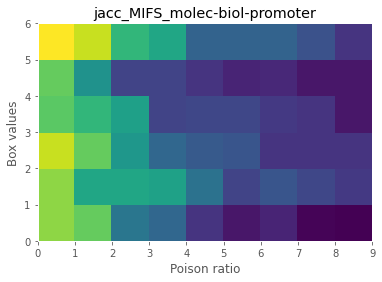

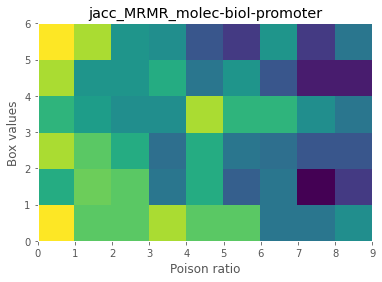

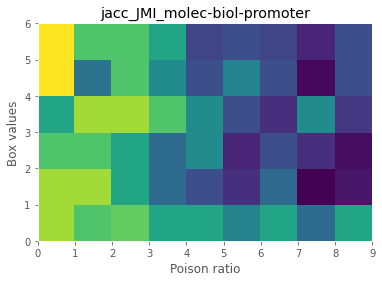

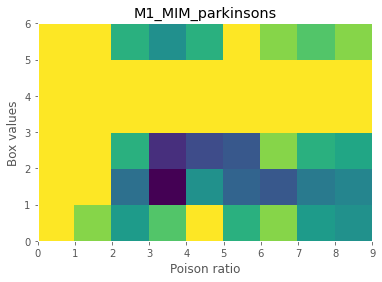

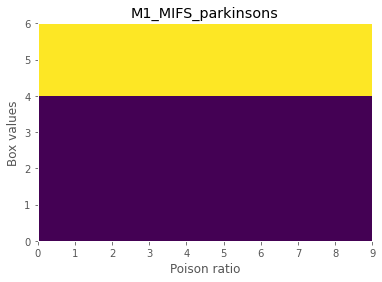

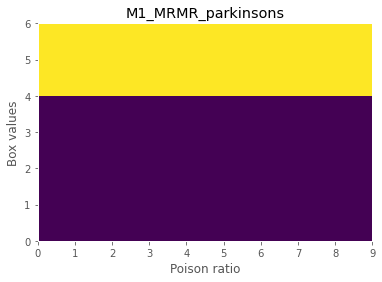

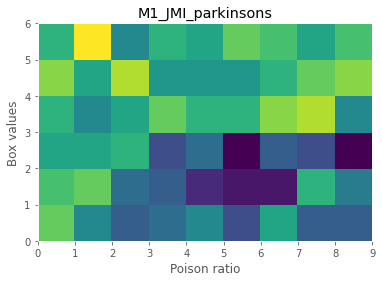

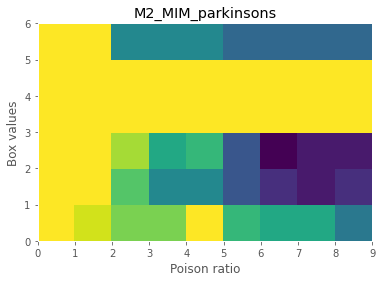

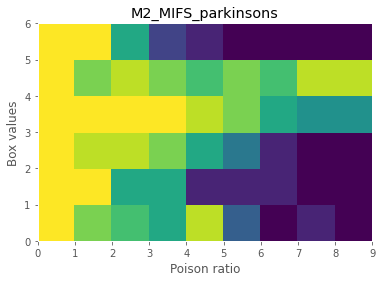

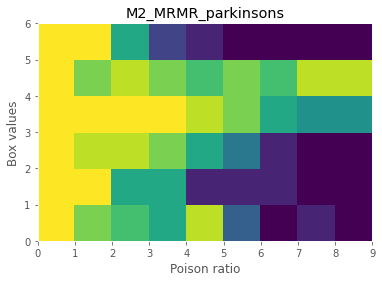

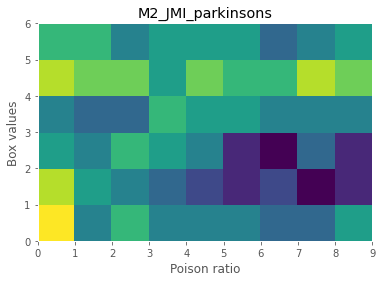

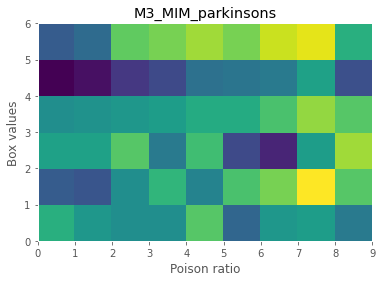

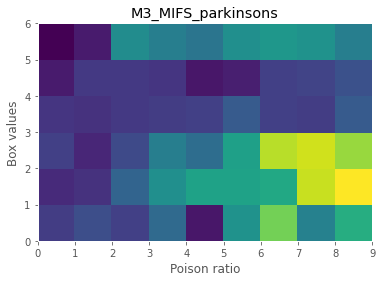

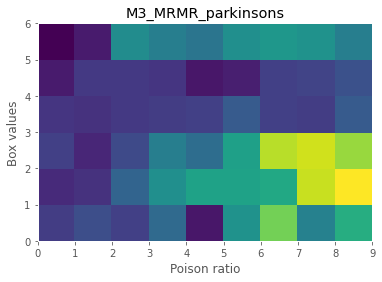

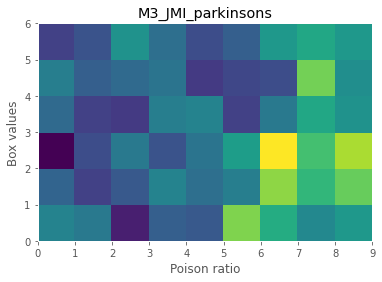

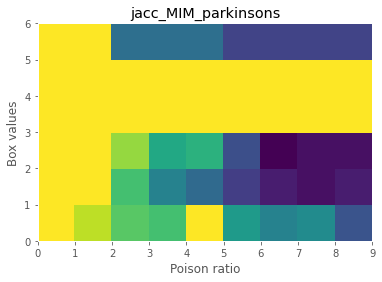

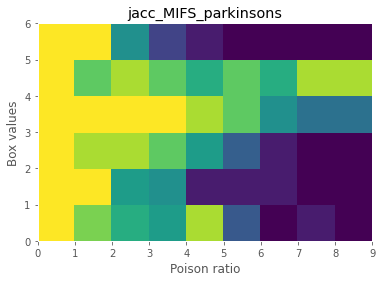

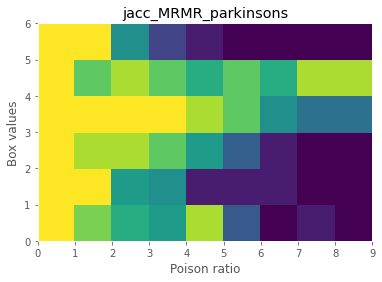

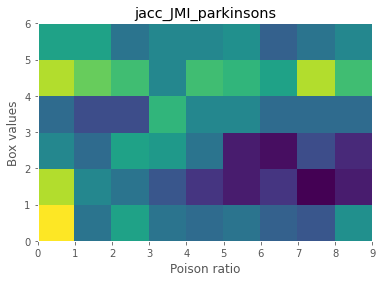

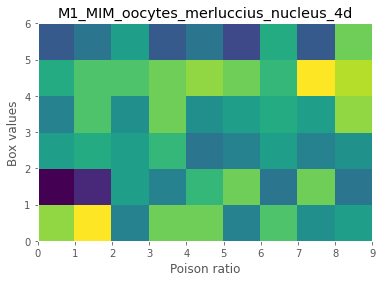

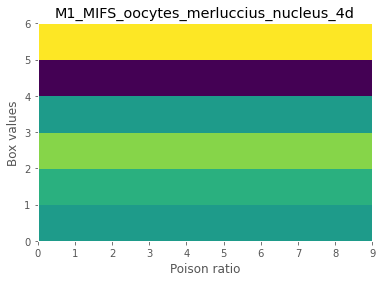

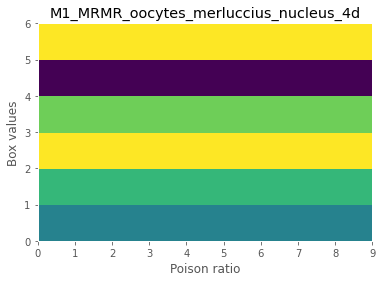

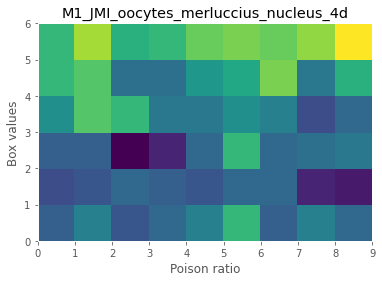

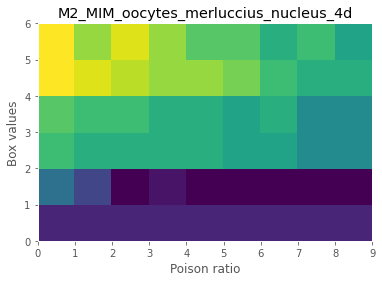

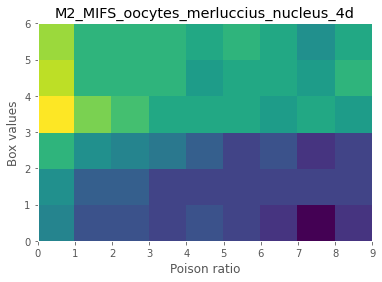

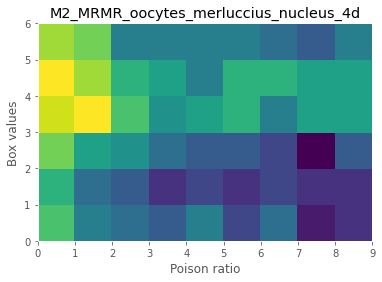

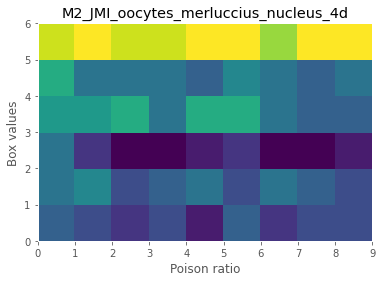

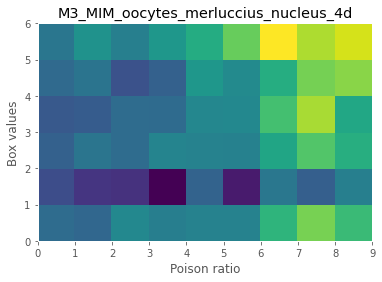

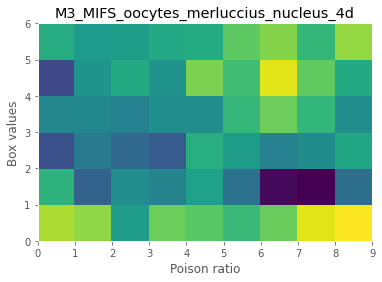

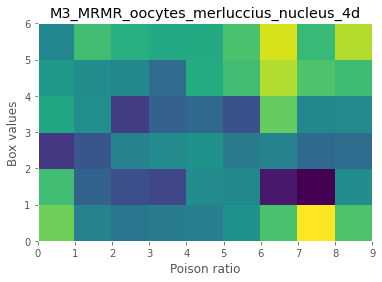

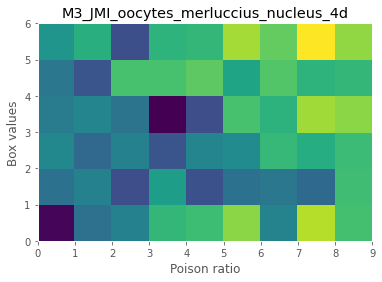

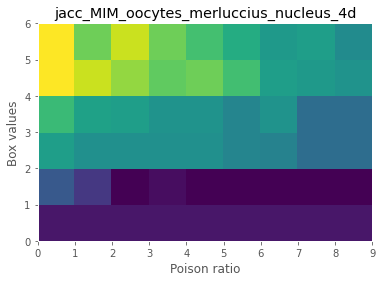

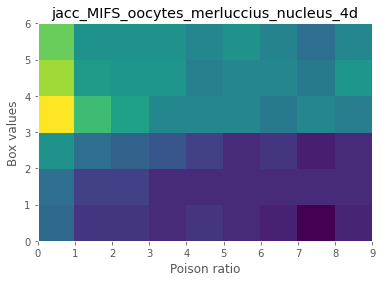

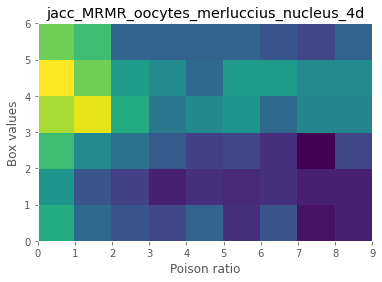

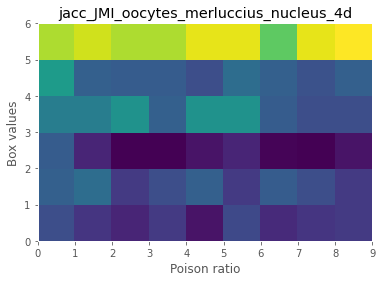

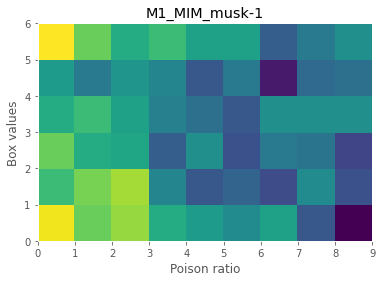

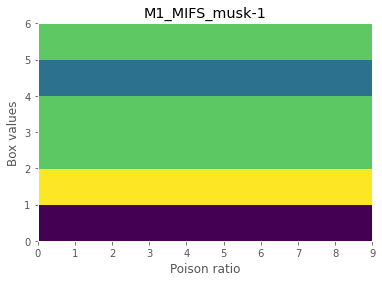

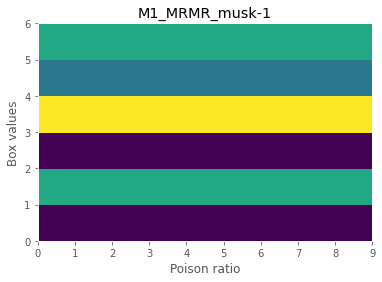

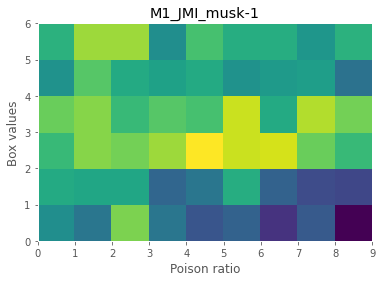

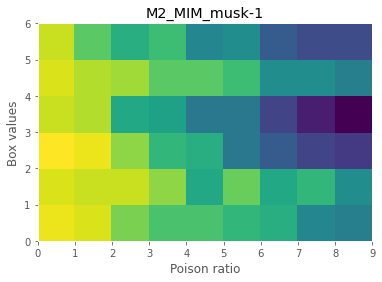

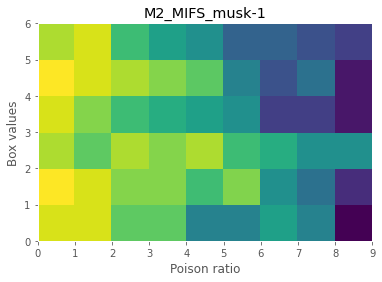

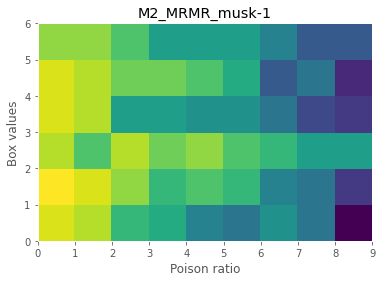

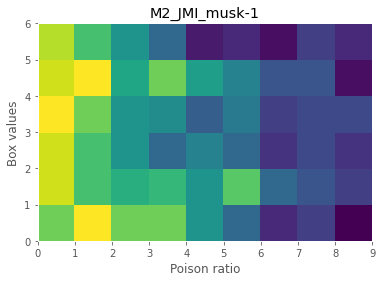

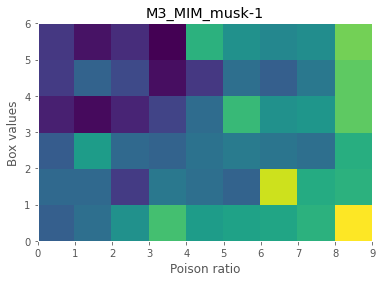

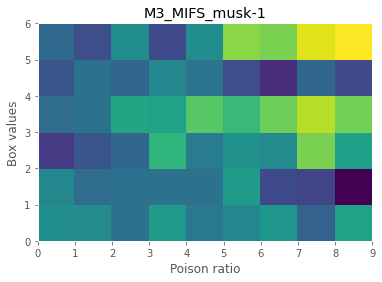

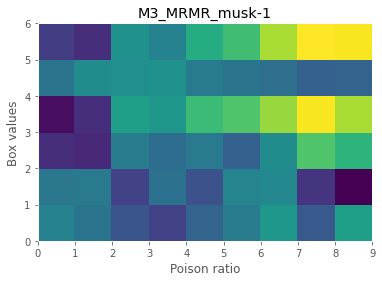

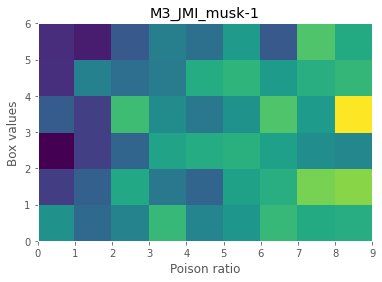

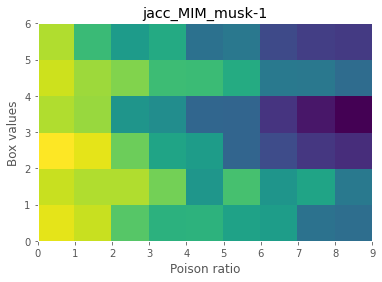

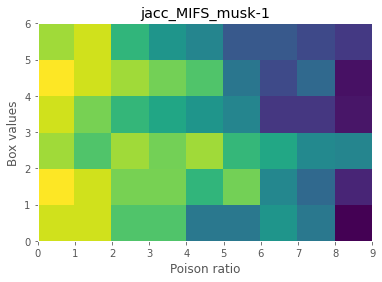

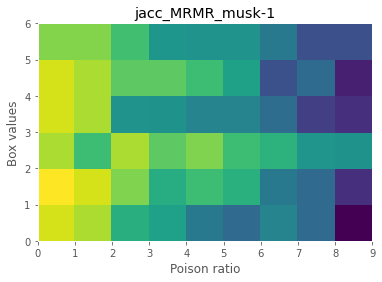

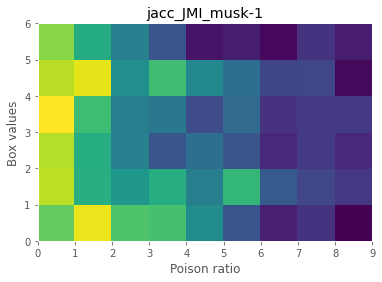

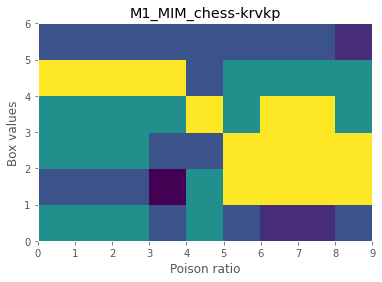

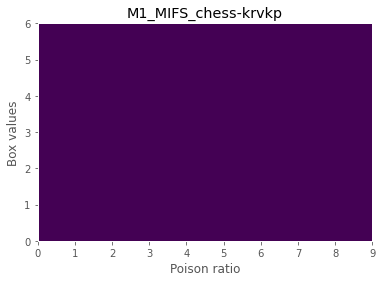

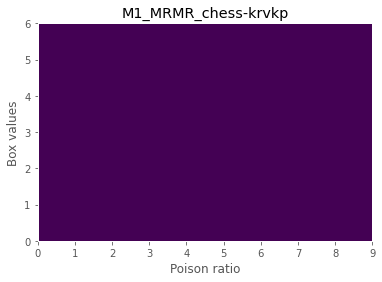

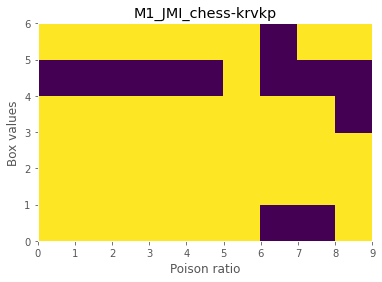

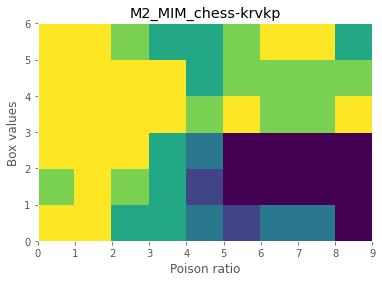

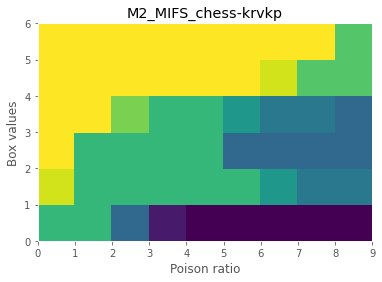

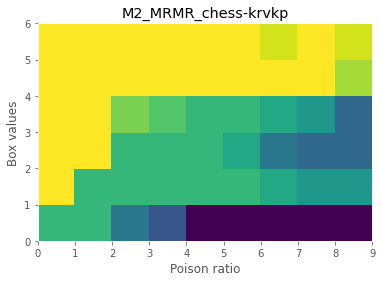

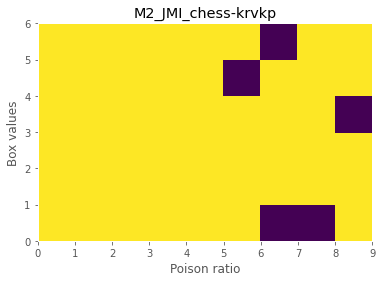

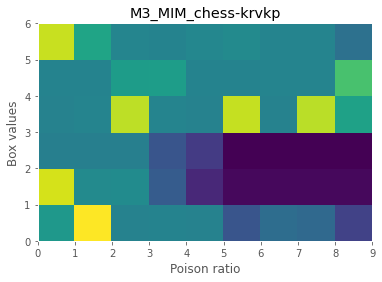

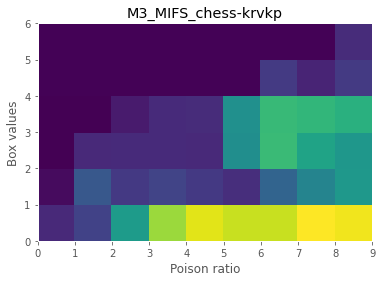

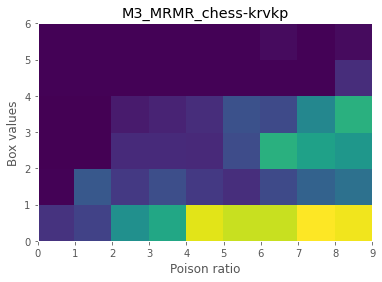

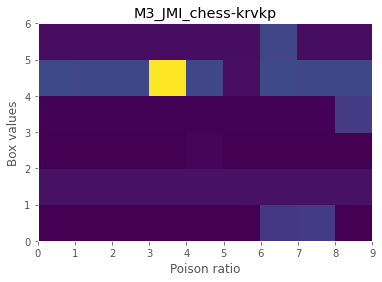

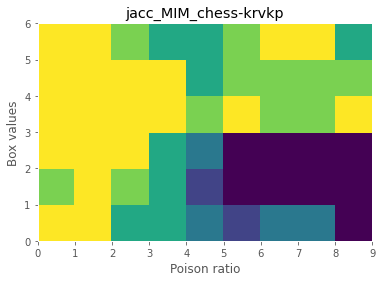

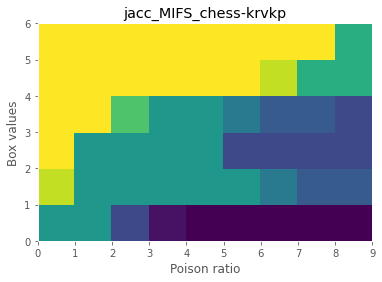

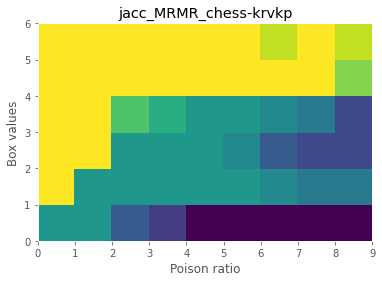

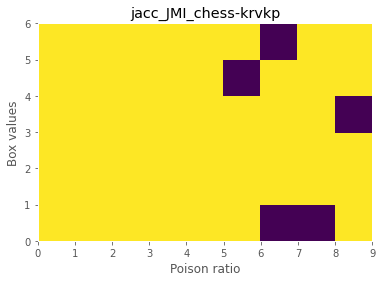

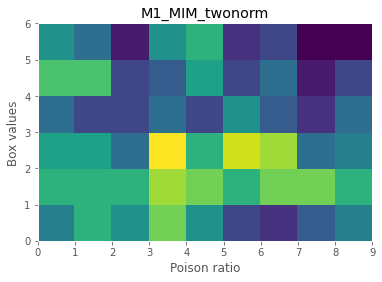

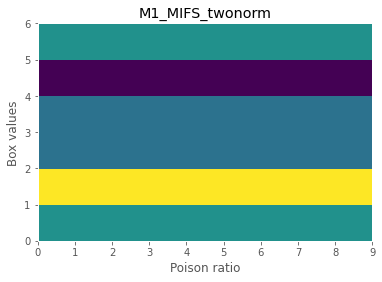

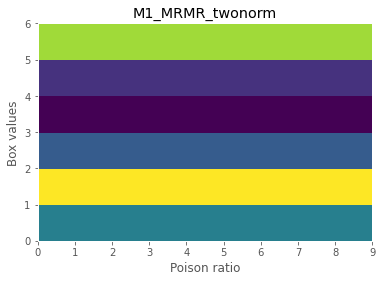

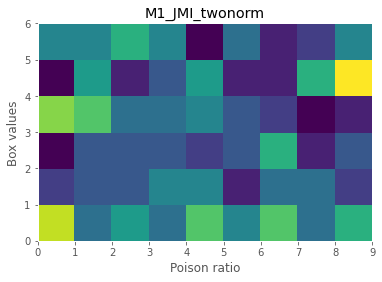

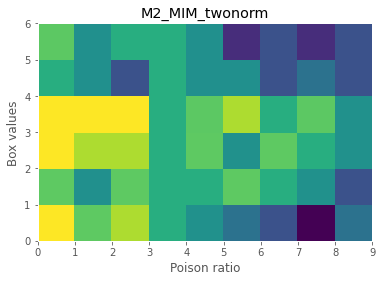

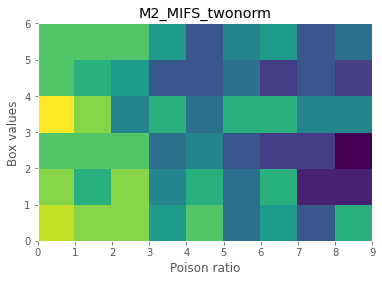

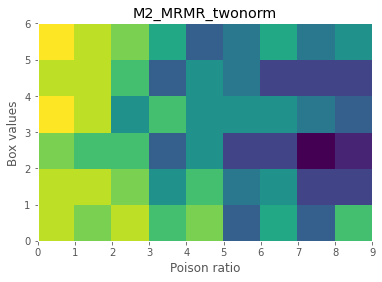

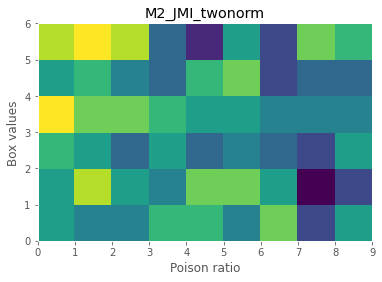

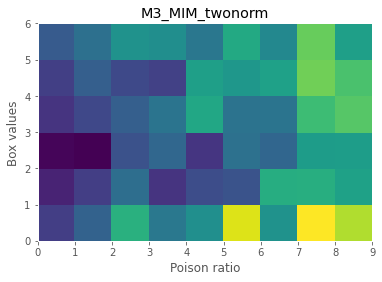

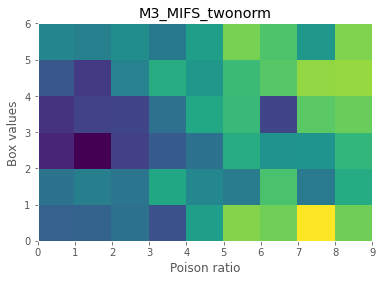

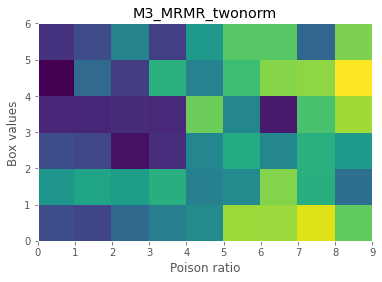

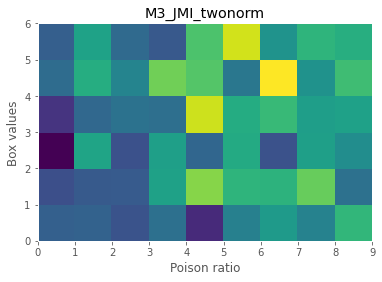

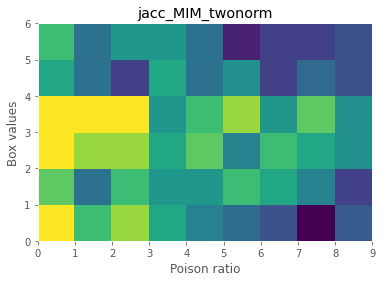

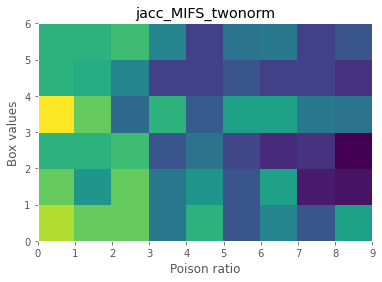

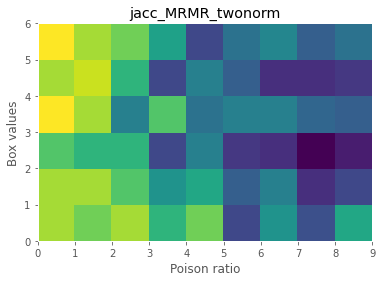

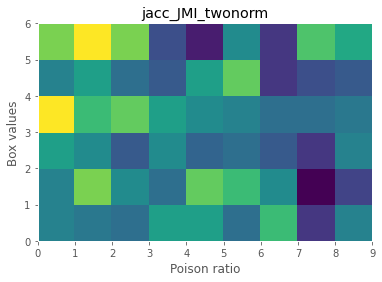

In [107]:
for l in range(len(DATA)): 
    M = []
    M1 = []
    M2 = []
    M3 = []
    jacc = []
    for i in range(len(BOX)): 
        d = np.load('results/M1_M2_M3/' + DATA[l] + '_[xiao][' + BOX[i] + ']_results.npz')
        jacc.append(d['err_jaccard'])
        M1.append(d['M1'])
        M2.append(d['M2'])
        M3.append(d['M3_pois'])   
    
    # Packing M1, M2, M3 and jacc list in single list M for unpacking later while assignment
    M.append(M1)
    M.append(M2)
    M.append(M3)
    M.append(jacc)
    
    # 4x4 matrix holding matrices of size 6x9
    mesh_M_A = np.zeros((len(param), NALG, len(BOX), NPR))
    for row in range(len(param)):
        for col in range(len(ALGS)):
            for b in range(len(M[0])):
                mesh_M_A[row][col][b,:] = M[row][b][:, col]
            plt.figure()
            plt.pcolormesh(mesh_M_A[row][col])
            plt.xlabel('Poison ratio')
            plt.ylabel('Box values')       # Box values are in ascending order top to bottom, ie, 6 on yaxis refers to BOX[0] and consequently 1 on yaxis refers to Box[5]
            plt.title(str(param[row])+ '_'+ str(ALGS[col]) + '_'+ str(DATA[l]))
            plt.savefig('plots/Colormesh_M1_M2_M3/'+ param[row]+ '_'+ ALGS[col] + '_'+ DATA[l]+ '.pdf')